In [1]:

# importing libraries 

import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

tf.__version__

2023-08-21 21:57:59.983218: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.10.0'

In [2]:

data = keras.datasets.fashion_mnist

# keras ko fashion_mnist data use gareko
    

In [3]:

(x_train, y_train), (x_test, y_test) = data.load_data()
# fashion_mnist dataset lai load garxa ra tyo data lai training ra testing set maa split garera data assign garxa


In [4]:

class_names = [
                "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat"
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
              ]

# euta class_names gareko list define gareko , 
# that corresponds to the labels of different clothing categories in the Fashion MNIST dataset.

### Now, it's time to clean the data. Computers understand values between 0 and 1, that is binary. 
### The pixel values in the dataset is given as the range of 0 - 255, which isn't understandable.
### We need to bring them into the range of 0 and 1 by preprocessing it.

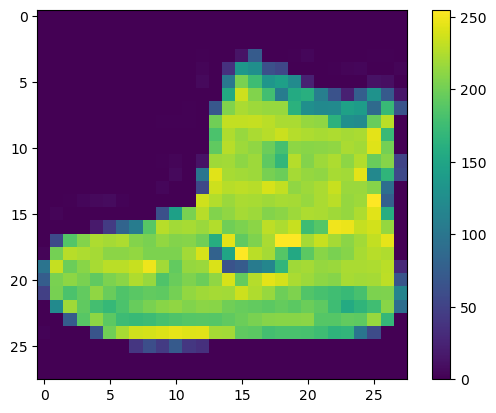

In [5]:

# colormap use garera data check gareko 

# Create a figure
plt.figure()

# Display an image
plt.imshow(x_train[0])

# Enable colorbar and disable grid
plt.colorbar()
plt.grid(False)

# Show the plot
plt.show()


### mathi ko first data herda pixel value 255 samma xa ,aba we preprocess it in the correct range(i.e change the range into 0 to 1)

In [6]:

x_train = x_train / 255.0

x_test = x_test / 255.0


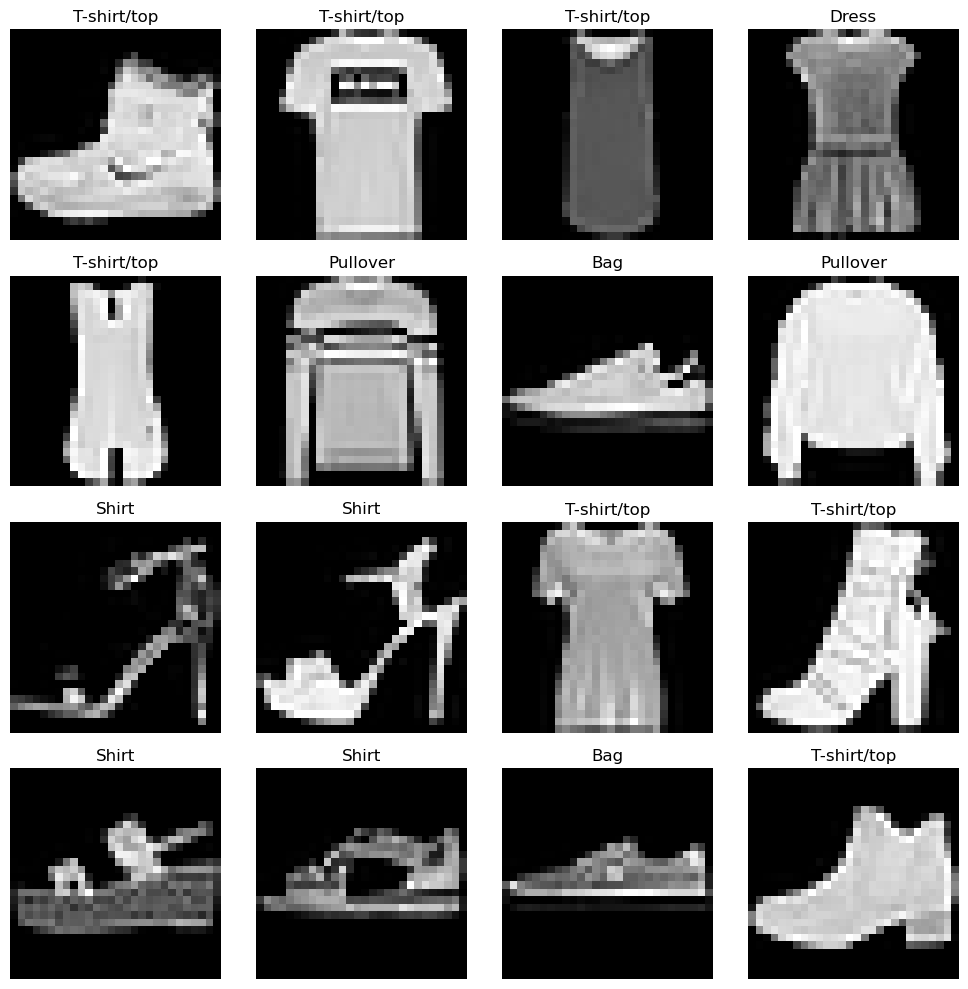

In [7]:
# matolotlib cmap use garera data ko samples hereko

# Display a range of images
num_images = 16
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    label_index = y_train[i] if 0 <= y_train[i] < len(class_names) else 0
    plt.title(class_names[label_index])
    plt.axis('off')

plt.tight_layout()
plt.show()


### Creating a model 


--> 2-D image data lai 1-D aray maa flatten garera euta sequential model banauxau

In [8]:

model = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(128, activation="relu"),
                           keras.layers.Dense(10, activation="softmax")
                        ])

2023-08-21 21:58:51.645484: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-21 21:58:51.704674: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Let's understand it.

 ---> The first layer get's an input of 2D, 28 by 28 size, hence we define as (28, 28) and pass it to the Flatten layer.
    
--->    Once done, we make a dense layer of size 128, enough to fit our data and process it.
    
 --->   And finally the last layer, which is a Dense layer of size 10, It's sized 10, as we have 10 categories of clothing.
 
 --->   The activation is relu in second one for faster and better processing, The formulae is y = max(0,x), It stands for rectified linear unit.
 
 --->   And softmax for the last one since we're classifying. Softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.

Once done, you can take a summary of the model by using model.summary()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
# compiling our model (model fit garna agadi compile garna parxa)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [11]:

# model compile bhaisake pachi ,model maa data fit garera model train garna parxa
model.fit(x_train, y_train, epochs=42)

Epoch 1/42
1875/1875 [==============================] - 52s 25ms/step - loss: 0.4979 - accuracy: 0.8244
Epoch 2/42
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3747 - accuracy: 0.8650
Epoch 3/42
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3389 - accuracy: 0.8761
Epoch 4/42
1875/1875 [==============================] - 51s 27ms/step - loss: 0.3114 - accuracy: 0.8855
Epoch 5/42
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2940 - accuracy: 0.8919
Epoch 6/42
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2809 - accuracy: 0.8964
Epoch 7/42
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2686 - accuracy: 0.9002
Epoch 8/42
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2552 - accuracy: 0.9037
Epoch 9/42
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2484 - accuracy: 0.9070
Epoch 10/42
1875/1875 [==============================] - 46s 25m

In [15]:

# testing the model
test_loss, test_acc = model.evaluate(x_test,  y_test)


313/313 [==============================] - 6s 18ms/step - loss: 0.4459 - accuracy: 0.8864


In [13]:
# we can print the accuracy as 
print(f"Accuracy: {test_acc}")

Accuracy: 0.8863999843597412
